Enter the country you want to analyze:  rwanda



✅ Showing data for: Rwanda


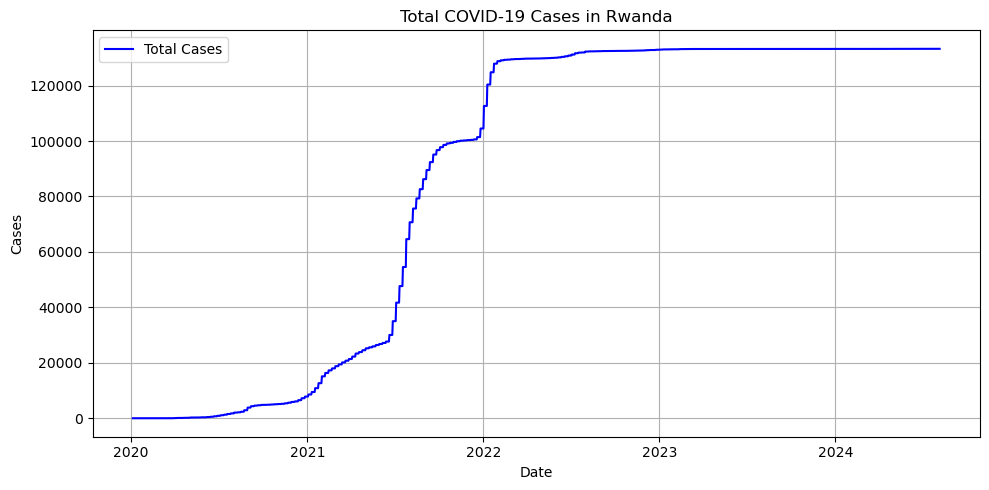

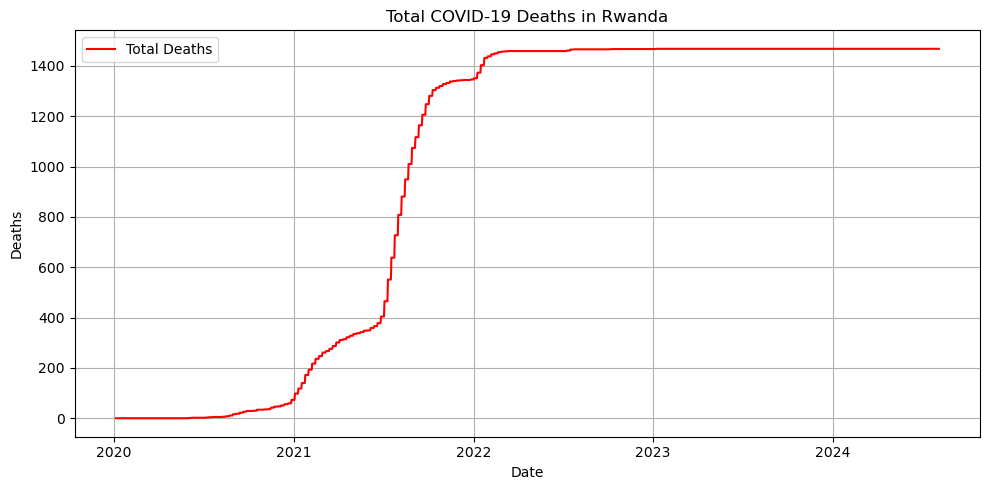

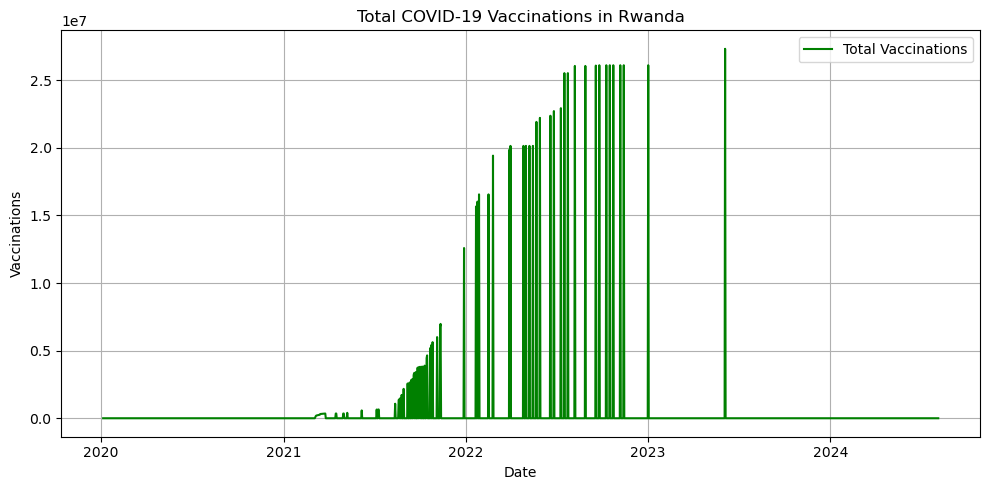

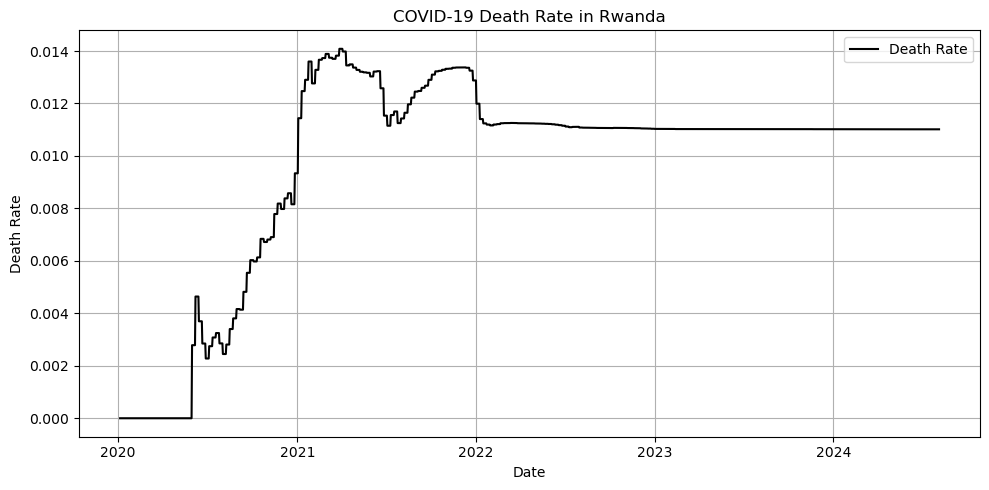


📌 Total COVID-19 Stats for Rwanda:
Total Cases: 133264
Total Deaths: 1468
Total Vaccinations: 27322059
Estimated Recoveries: 131796
Overall Death Rate: 1.10%


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
# Load dataset
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

# Preview data
df.head()
# List of all available countries
countries = df['location'].unique()

# Input from user
country = input("Enter the country you want to analyze: ").title()

# Validate
if country not in countries:
    print(f"\n❌ '{country}' not found in the dataset.")
    print("Some example countries include:\n", ', '.join(list(countries[:10])))
else:
    print(f"\n✅ Showing data for: {country}")
# Filter data for selected country
country_data = df[df['location'] == country].copy()

# Fill missing values in key columns
columns_to_fill = ['total_cases', 'total_deaths', 'total_vaccinations']
for col in columns_to_fill:
    if col in country_data.columns:
        country_data[col] = country_data[col].fillna(0)

# Sort by date
country_data = country_data.sort_values('date')

# Plot for Total Cases
plt.figure(figsize=(10,5))
plt.plot(country_data['date'], country_data['total_cases'], label="Total Cases", color='blue')
plt.title(f"Total COVID-19 Cases in {country}")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,5))
plt.plot(country_data['date'], country_data['total_deaths'], label="Total Deaths", color='red')
plt.title(f"Total COVID-19 Deaths in {country}")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(country_data['date'], country_data['total_vaccinations'], label="Total Vaccinations", color='green')
plt.title(f"Total COVID-19 Vaccinations in {country}")
plt.xlabel("Date")
plt.ylabel("Vaccinations")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Calculate death rate = deaths / cases
country_data['death_rate'] = country_data['total_deaths'] / country_data['total_cases']
country_data['death_rate'] = country_data['death_rate'].fillna(0)

plt.figure(figsize=(10,5))
plt.plot(country_data['date'], country_data['death_rate'], label="Death Rate", color='black')
plt.title(f"COVID-19 Death Rate in {country}")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Calculate total values
total_cases = country_data['total_cases'].max()
total_deaths = country_data['total_deaths'].max()
total_vaccinations = country_data['total_vaccinations'].max()

# Estimate recovered cases
estimated_recovered = total_cases - total_deaths if total_cases > 0 else 0

# Calculate overall death rate
if total_cases > 0:
    death_rate = total_deaths / total_cases
else:
    death_rate = 0

# Print summary
print(f"\n📌 Total COVID-19 Stats for {country}:")
print(f"Total Cases: {int(total_cases)}")
print(f"Total Deaths: {int(total_deaths)}")
print(f"Total Vaccinations: {int(total_vaccinations)}")
print(f"Estimated Recoveries: {int(estimated_recovered)}")
print(f"Overall Death Rate: {death_rate:.2%}")

